In [ ]:
import os.path as op

In [2]:
import AFQ.data as afd
import nibabel as nib

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#afd.fetch_hcp(['992774', '994273'])

In [4]:
from AFQ import api

In [5]:
base_dir = op.join(op.expanduser('~'), 'AFQ_data', 'HCP_copy')

In [6]:
myafq = api.AFQ(preproc_path=base_dir, sub_prefix='sub', b0_threshold=15, n_seeds=1000, random_seeds=True, bundle_list=["SLF", "ARC", "CST", "FP"])

Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/AFQ_data/templates 


In [7]:
myafq.bundle_dict

{'SLF_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116b57c88>,
  'rules': [True, True, False],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116b609b0>,
  'cross_midline': False,
  'uid': 1},
 'SLF_L': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116b57eb8>,
  'rules': [True, True, False],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116b60828>,
  'cross_midline': False,
  'uid': 2},
 'ARC_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116b57c88>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116b69630>,
  'cross_midline': False,
  'uid': 3},
 'ARC_L': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x116b57eb8>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x116b694a8>,
  'cross_midline': False,
  'uid': 4},
 'CST_R': {'ROIs': [<nibabel.nifti1.Nifti1Image at 0x11683e198>,
  'rules': [True, True],
  'prob_map': <nibabel.nifti1.Nifti1Image at 0x11683e710>,
  'cross_midline': False,
  'uid': 5},
 'CST_L': {'ROIs': [<nibabel.nifti1.Nifti1Imag

In [8]:
import time

In [9]:
t1 = time.time()

In [10]:
bb = myafq.bundles

In [11]:
t2 = time.time()

In [12]:
print(t2-t1)

0.01224207878112793


In [13]:
import AFQ.viz as afv

In [14]:
import dipy.data as dpd
reg_template = dpd.read_mni_template()

Data size is approximately 70MB
Dataset is already in place. If you want to fetch it again please first remove the folder /Users/arokem/.dipy/mni_template 


In [15]:
b0 = nib.load(myafq.dti_fa[0]).get_data()

In [16]:
myafq.dwi_affine[0]

array([[  -1.25,    0.  ,    0.  ,   90.  ],
       [   0.  ,    1.25,    0.  , -126.  ],
       [   0.  ,    0.  ,    1.25,  -72.  ],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [17]:
# ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['ARC_L']['uid'], interact=False, inline=False, color=(0, 0, 1))
# ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['ARC_R']['uid'], interact=False, inline=False, color=(1, 0, 0), ren=ren)
# ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['SLF_R']['uid'], interact=False, inline=False, color=(1, 1, 0), ren=ren)
# ren = afv.visualize_bundles(myafq.clean_bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
#                             bundle=myafq.bundle_dict['SLF_L']['uid'], interact=False, inline=False, color=(0, 1, 1), ren=ren)
# ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
#                         inline=False, interact=False, color=(1, 0, 0), ren=ren)
# ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][1], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
#                         inline=False, interact=False, color=(0, 1, 0), ren=ren)
# ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][2], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
#                         interact=False, color=(0, 0, 1), ren=ren)
# ren = afv.visualize_volume(b0, inline=True, interact=True, ren=ren);

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


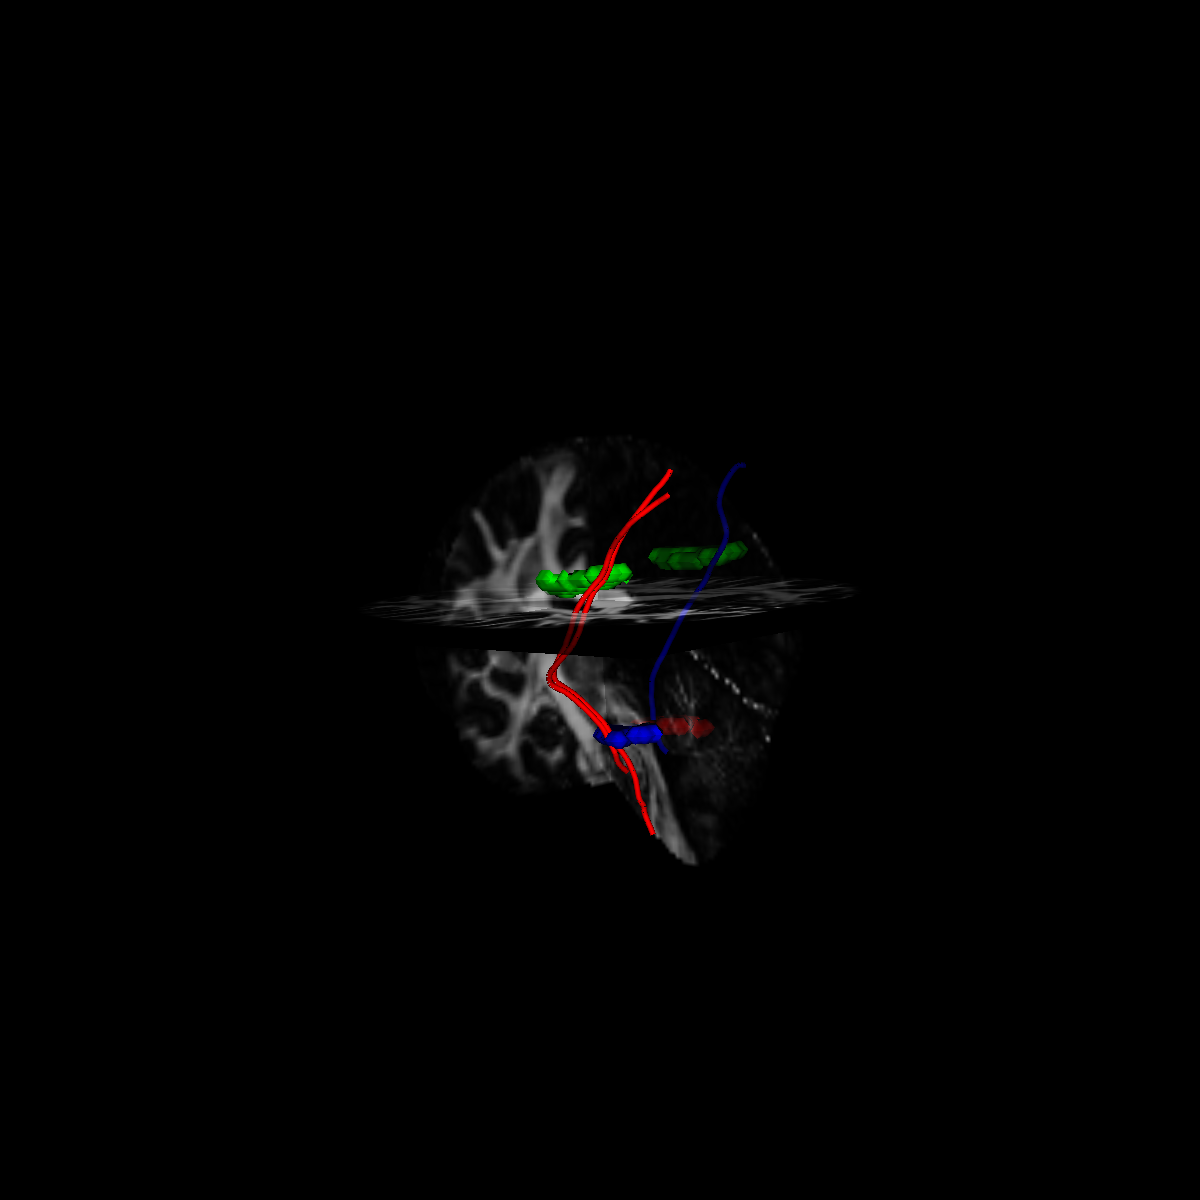

In [18]:
ren = afv.visualize_bundles(myafq.bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                            bundle=myafq.bundle_dict['CST_L']['uid'], interact=False, inline=False, color=(0, 0, 1))
ren = afv.visualize_bundles(myafq.bundles[0], affine_or_mapping=myafq.dwi_affine[0], 
                            bundle=myafq.bundle_dict['CST_R']['uid'], interact=False, inline=False, color=(1, 0, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['CST_L']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(1, 0, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['CST_L']['ROIs'][1], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(0, 1, 0), ren=ren)
ren = afv.visualize_roi(myafq.bundle_dict['CST_R']['ROIs'][0], myafq.mapping[0], reg_template=reg_template, static_img=myafq.data_frame.dwi_file[0], 
                        inline=False, interact=False, color=(0, 0, 1), ren=ren)

ren = afv.visualize_volume(b0, inline=True, interact=True, ren=ren)

In [19]:
ren

(Renderer)0x122ed4348

/Users/arokem/.virtualenvs/afq/lib/python3.6/site-packages/vtk/util/numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


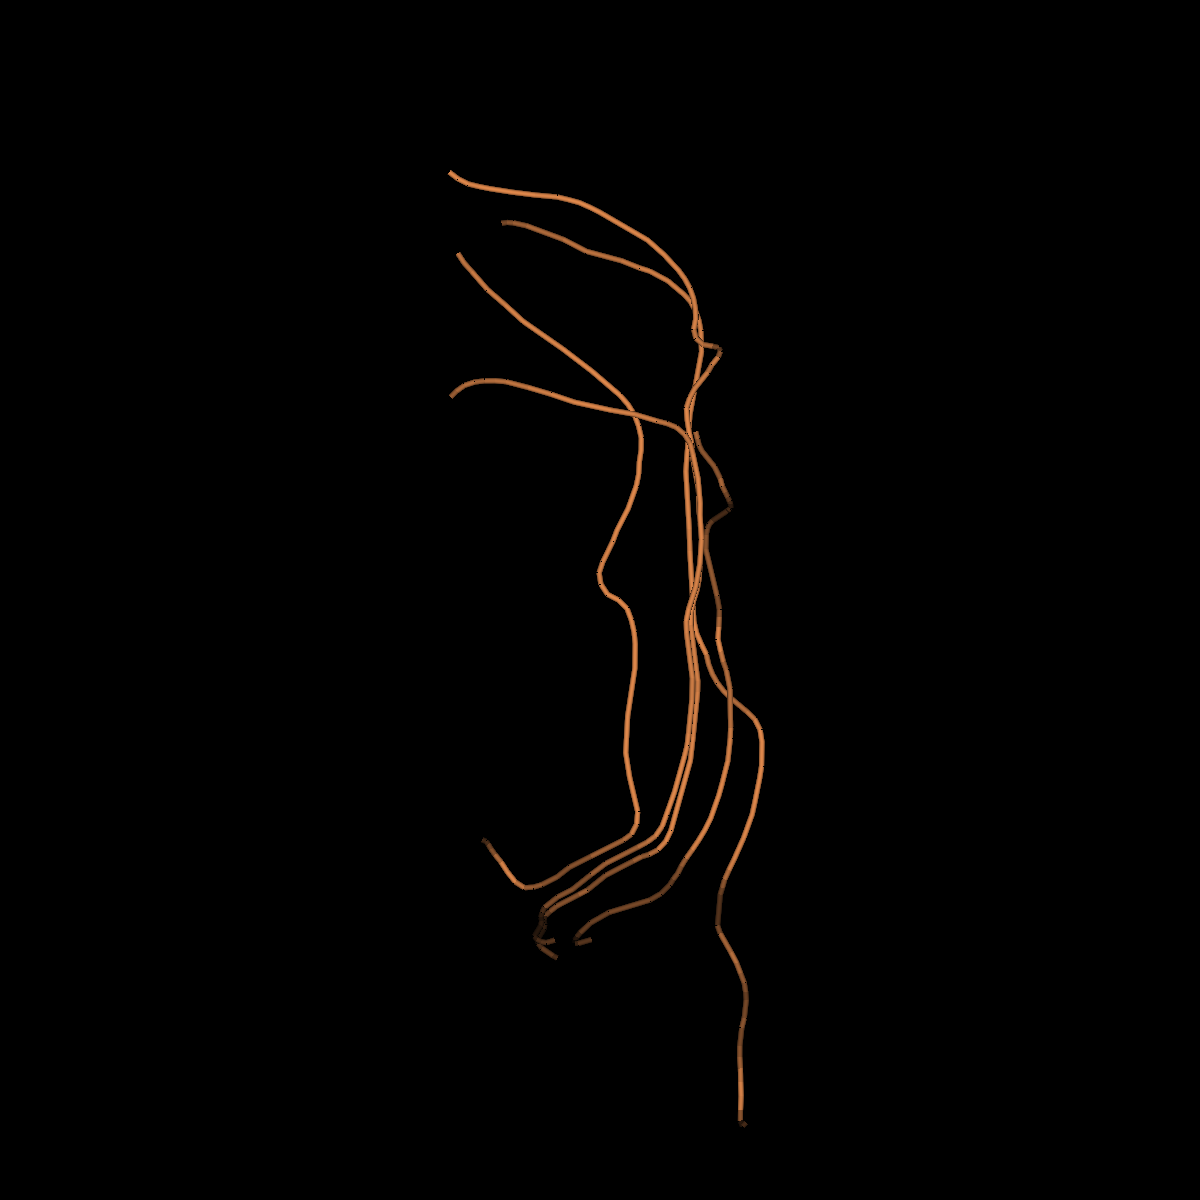

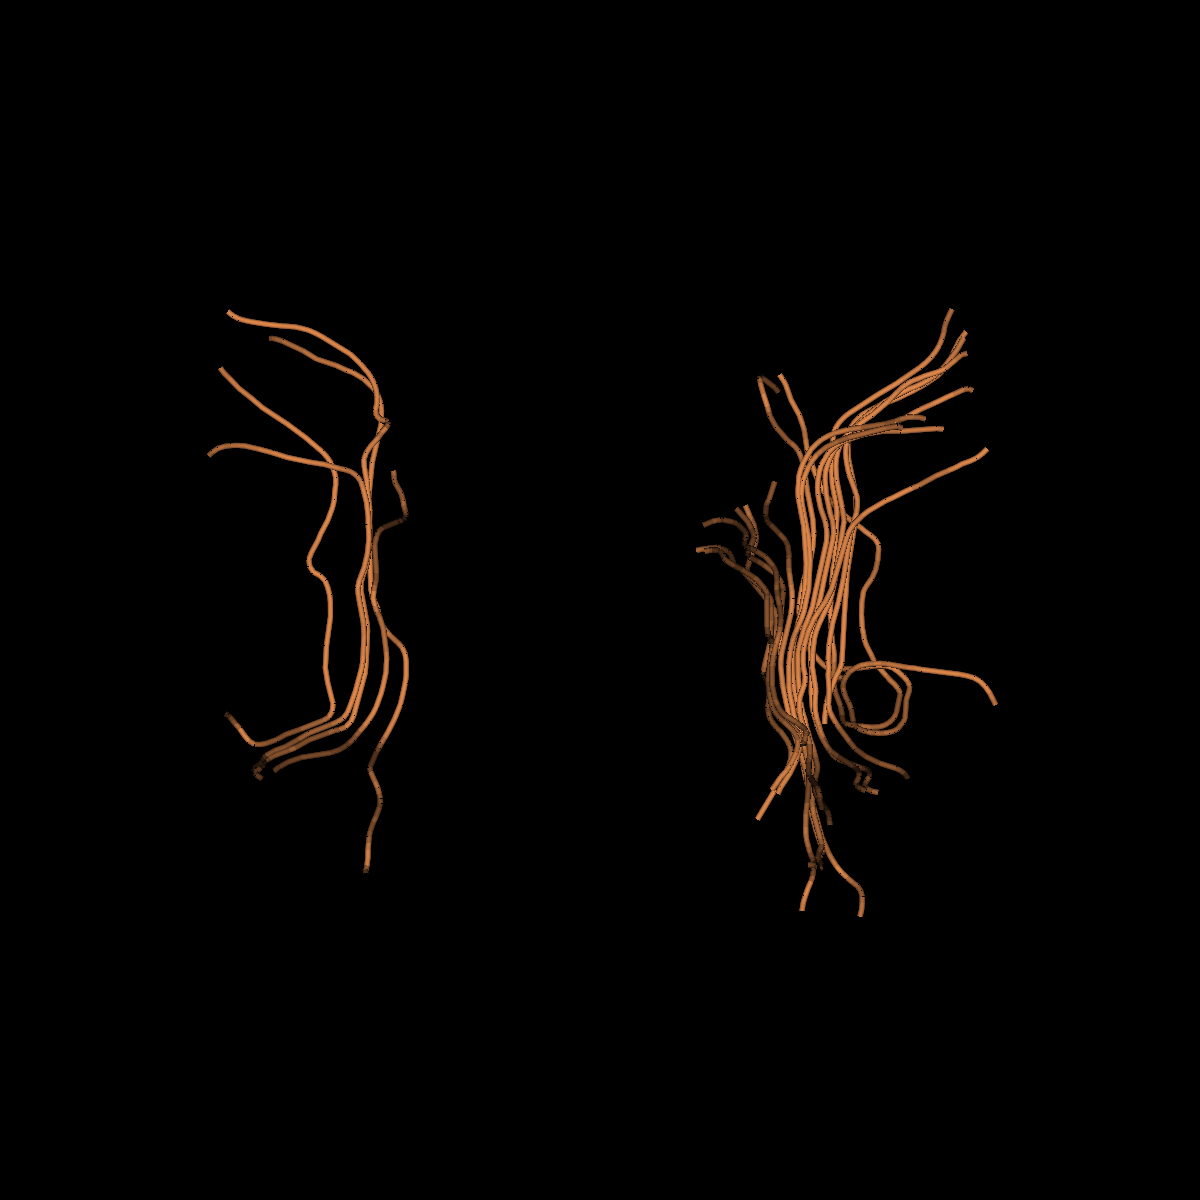

In [20]:
ren = afv.visualize_bundles(myafq.bundles[0], bundle=myafq.bundle_dict['SLF_L']['uid'], interact=False)
ren = afv.visualize_bundles(myafq.bundles[0], bundle=myafq.bundle_dict['SLF_R']['uid'], ren=ren, interact=False)
#ren = afv.visualize_roi(myafq.bundle_dict['SLF_L']['ROIs'][2], ren=ren, interact=True);

In [21]:
debug

ERROR:root:No traceback has been produced, nothing to debug.


In [22]:
import nibabel as nib 
trk = nib.streamlines.load(myafq.clean_bundles[0])

In [23]:
trk.header

{'magic_number': b'TRACK',
 'dimensions': array([1, 1, 1], dtype=int16),
 'voxel_sizes': array([1., 1., 1.], dtype=float32),
 'origin': array([0., 0., 0.], dtype=float32),
 'nb_scalars_per_point': 0,
 'scalar_name': array([b'', b'', b'', b'', b'', b'', b'', b'', b'', b''], dtype='|S20'),
 'nb_properties_per_streamline': 1,
 'property_name': array([b'bundle', b'', b'', b'', b'', b'', b'', b'', b'', b''],
       dtype='|S20'),
 'voxel_to_rasmm': array([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]], dtype=float32),
 'reserved': b'',
 'voxel_order': b'RAS',
 'pad2': b'',
 'image_orientation_patient': array([0., 0., 0., 0., 0., 0.], dtype=float32),
 'pad1': b'',
 'invert_x': b'',
 'invert_y': b'',
 'invert_z': b'',
 'swap_xy': b'',
 'swap_yz': b'',
 'swap_zx': b'',
 'nb_streamlines': 54,
 'version': 2,
 'hdr_size': 1000,
 'endianness': '<',
 '_offset_data': 1000}

In [24]:
trk.streamlines[0]

array([[ 53.200005 ,  -6.0731564,  30.36083  ],
       [ 52.484505 ,  -6.767908 ,  30.434196 ],
       [ 51.68528  ,  -7.368742 ,  30.44979  ],
       [ 50.784203 ,  -7.7817116,  30.317467 ],
       [ 49.8611   ,  -8.100782 ,  30.102823 ],
       [ 49.013206 ,  -8.571774 ,  29.859417 ],
       [ 48.147118 ,  -8.948837 ,  29.531239 ],
       [ 47.360123 ,  -9.290005 ,  29.01718  ],
       [ 46.573128 ,  -9.631163 ,  28.50312  ],
       [ 45.87922  , -10.030333 ,  27.903831 ],
       [ 45.18531  , -10.4295025,  27.304543 ],
       [ 44.491394 , -10.828672 ,  26.705254 ],
       [ 43.704407 , -11.16984  ,  26.191204 ],
       [ 42.803326 , -11.5828285,  26.058882 ],
       [ 41.91197  , -12.0317135,  26.12191  ],
       [ 41.020615 , -12.480618 ,  26.184948 ],
       [ 40.11932  , -12.8715   ,  26.371725 ],
       [ 39.280476 , -13.3563   ,  26.619318 ],
       [ 38.441628 , -13.84111  ,  26.866901 ],
       [ 37.602783 , -14.325911 ,  27.114494 ],
       [ 36.842354 , -14.904638 ,  27.40

In [25]:
len(trk.streamlines)

54

In [26]:
import nibabel as nib

In [27]:
dti_params = nib.load(myafq.dti[0])

In [28]:
dti_params.affine

array([[  -1.25,    0.  ,    0.  ,   90.  ],
       [   0.  ,    1.25,    0.  , -126.  ],
       [   0.  ,    0.  ,    1.25,  -72.  ],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [29]:
myafq.dwi_affine[0]

array([[  -1.25,    0.  ,    0.  ,   90.  ],
       [   0.  ,    1.25,    0.  , -126.  ],
       [   0.  ,    0.  ,    1.25,  -72.  ],
       [   0.  ,    0.  ,    0.  ,    1.  ]])

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

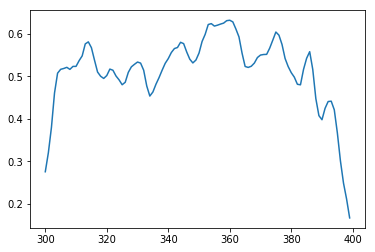

In [31]:
df = pd.read_csv(myafq.tract_profiles[0])
plt.plot(df[(df['scalar'] == "dti_fa") & (df['bundle']=="ARC_L")]['profiles'])

In [32]:
df['bundle'].unique()

array(['SLF_R', 'SLF_L', 'ARC_R', 'ARC_L', 'CST_R', 'CST_L', 'FP'],
      dtype=object)

In [33]:
df[df['bundle']=="CST_L"]

,Unnamed: 0,bundle,node,profiles,scalar
500,500,CST_L,0,0.529478,dti_fa
501,501,CST_L,1,0.466619,dti_fa
502,502,CST_L,2,0.343449,dti_fa
503,503,CST_L,3,0.346664,dti_fa
504,504,CST_L,4,0.400925,dti_fa
505,505,CST_L,5,0.437722,dti_fa
506,506,CST_L,6,0.458897,dti_fa
507,507,CST_L,7,0.517236,dti_fa
508,508,CST_L,8,0.562007,dti_fa
509,509,CST_L,9,0.581178,dti_fa


In [34]:
1000/60

16.666666666666668